In [18]:
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature
import cmocean
import numpy as np
from matplotlib import pyplot as plt
import xarray as xr

In [19]:
ds = xr.open_dataset(
    "/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/CO2flux_OAE_2.6_cropped.nc",
).isel(
    drop=True
)

ds.coords["x"] = range(ds.dims["x"])
ds.coords["y"] = range(ds.dims["y"])

In [20]:
ds = ds.co2flux[0,:]

In [21]:
ds = ds.to_dataset()

In [22]:
co2flux = ds.co2flux.rename("co2flux")

In [23]:
display(co2flux)

<xarray.DataArray 'co2flux' (y: 105, x: 65, time_counter: 1020)>
[6961500 values with dtype=float64]
Coordinates:
    time          float64 0.0
    nav_lat       (y, x) float32 ...
    nav_lon       (y, x) float32 ...
  * time_counter  (time_counter) datetime64[ns] 2015-01-16T12:00:00 ... 2099-...
  * x             (x) int64 0 1 2 3 4 5 6 7 8 9 ... 56 57 58 59 60 61 62 63 64
  * y             (y) int64 0 1 2 3 4 5 6 7 8 ... 97 98 99 100 101 102 103 104

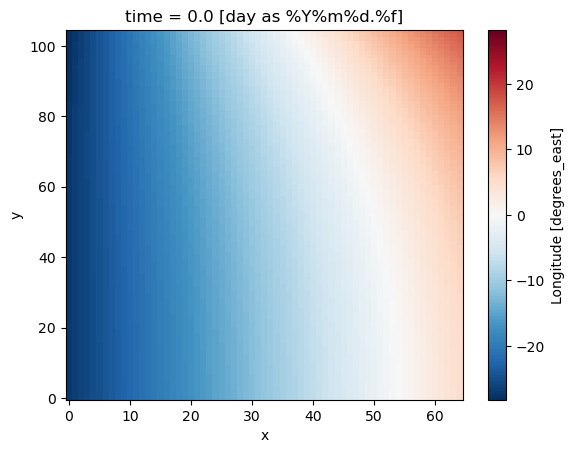

In [24]:
co2flux.coords["nav_lon"].plot()

In [25]:
after_discont = ~(co2flux.coords["nav_lon"].diff("x", label="upper") > 0).cumprod("x").astype(bool)

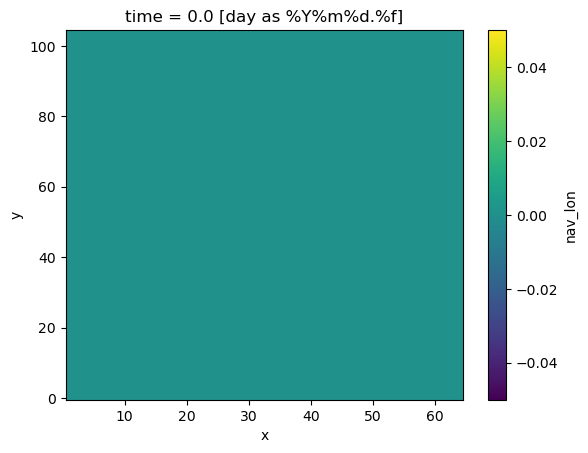

In [26]:
after_discont.plot()

In [27]:
co2flux.coords["nav_lon"] = (
    co2flux.coords["nav_lon"]
    + 360 * after_discont
)

In [28]:
co2flux = co2flux.isel(x=slice(1, -1), y=slice(None, -1))

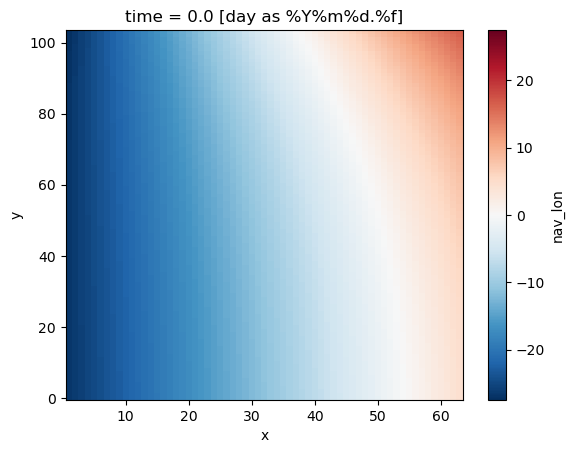

In [29]:
co2flux.coords["nav_lon"].plot()

In [30]:
ds_timeav = ds.co2flux.mean(dim=('time_counter'))

In [31]:
ds_timeav = ds_timeav.to_dataset(name='co2flux')

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


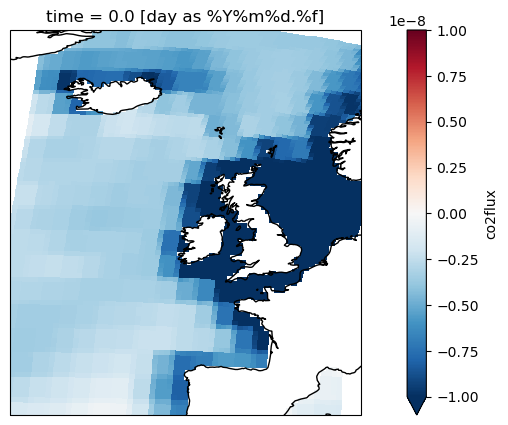

In [32]:
fig, ax = plt.subplots(
    1, 1,
    subplot_kw=dict(projection=cartopy.crs.Robinson()),
    figsize=(12, 5)
)
p = ds_timeav.co2flux.plot.pcolormesh(
    x='nav_lon', y='nav_lat',
    ax=ax,
    transform=cartopy.crs.PlateCarree(),
    cmap='RdBu_r',
    vmin=-0.00000001, vmax=0.00000001
)

ax.coastlines()
ax.set_extent([-25, 7, 40, 70])

In [34]:
ds = ds.sel(time_counter=slice('2090', '2100'))

### Averaged Annual Amplitude of CO2 flux for the last ten years without OAE

In [35]:
co2flux_max_base = ds.resample(time_counter='AS').max('time_counter')
co2flux_max_base = ds.groupby('time_counter.year').max('time_counter')

In [36]:
co2flux_min_base = ds.resample(time_counter='AS').min('time_counter')
co2flux_min_base = ds.groupby('time_counter.year').min('time_counter')

In [37]:
co2flux_amplitude_base = co2flux_max_base['co2flux'] - co2flux_min_base['co2flux']

In [38]:
co2flux_amplitude_base = co2flux_amplitude_base.to_dataset()

In [39]:
co2flux_amplitude_base_map = co2flux_amplitude_base.co2flux.mean(dim=('year'))

In [40]:
co2flux_amplitude_base_map = co2flux_amplitude_base_map.to_dataset()

In [41]:
co2flux_amplitude_base_map.co2flux

<xarray.DataArray 'co2flux' (y: 105, x: 65)>
array([[7.52475155e-09, 7.61948754e-09, 7.61948754e-09, ...,
        7.22268688e-09, 7.12694987e-09, 7.67319181e-09],
       [7.52485831e-09, 7.61948754e-09, 7.61948754e-09, ...,
        9.69823717e-09, 9.69823717e-09, 9.99219377e-09],
       [7.52497027e-09, 7.61948754e-09, 7.61948754e-09, ...,
        9.69823717e-09, 9.69823717e-09, 1.00061215e-08],
       ...,
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan]])
Coordinates:
    time     float64 0.0
    nav_lat  (y, x) float32 37.58 37.58 37.58 37.58 ... 68.0 67.88 67.76 67.64
    nav_lon  (y, x) float32 -27.25 -26.74 -26.24 -25.74 ... 16.21 16.8 17.39
  * x        (x) int64 0 1 2 3 4 5 6 7 8 9 10 ... 55 56 57 58 59 60 61 62 63 64
  * y        (y) int64 0 1 2 3 4 5 6 7 8 9 ... 96 97 98 99 100 101 102 103 104

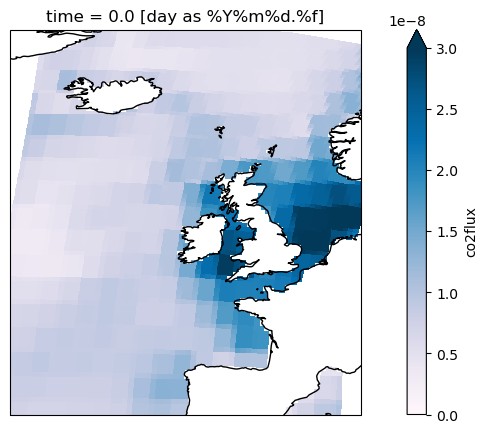

In [44]:
fig, ax = plt.subplots(
    1, 1,
    subplot_kw=dict(projection=cartopy.crs.Robinson()),
    figsize=(12, 5)
)
p = co2flux_amplitude_base_map.co2flux.plot.pcolormesh(
    x="nav_lon", y="nav_lat",
    ax=ax,
    transform=cartopy.crs.PlateCarree(),
    cmap='PuBu',
    vmin=0, vmax=0.00000003
)

ax.coastlines()
ax.set_extent([-25, 7, 40, 70])